# Data Science Problem Statement: Employee Attrition Prediction
Your task is to predict employee attrition using a given dataset. The dataset
includes various features related to employees, and the column names are self-
explanatory.

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
data = pd.read_csv("Employee.csv")

#checking the head and tail of the data
data

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,...,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2.0,...,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,...,4.0,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0.0,...,3.0,Mid,Large,5,No,No,No,Poor,High,Stayed


## Exploratory Data Analysis

In [3]:
# checking the columns and their datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

The given dataset consists of 24 columns and and 74498 rows.

The column names are self explanatory.

We are given a dataset to determine weathear an employee stayed or left the company.

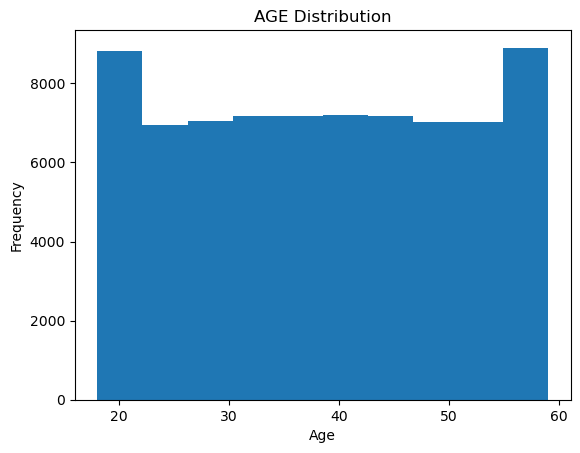

In [7]:
#checking the age distribution of the employees
data.Age.plot(kind="hist")
plt.xlabel("Age")
plt.title("AGE Distribution");

In [31]:
#checking the min age
data.Age.min()

18

In [32]:
#checking the max age
data.Age.max()

59

In [33]:
#checking the median age
data.Age.median()

39.0

* Most of employees are aged between 20 and 60.
* There is a slight increase in number of employees whose age is closer 20 and nearing 60.
* the distribustion is mostly normal.
* The median age of employees is 39

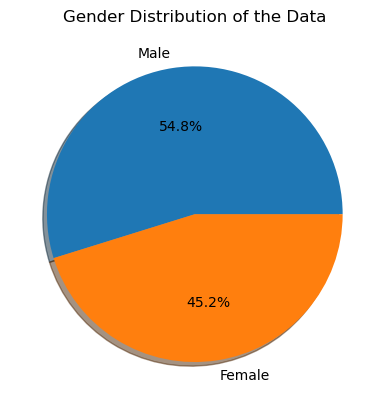

In [16]:
# gender distribution
plt.pie(data.Gender.value_counts().values, labels=data.Gender.value_counts().index, autopct="%1.1f%%", shadow=True)
plt.title("Gender Distribution of the Data")
plt.show()

* 54% of the employees are Male and 45.2% are Female employees

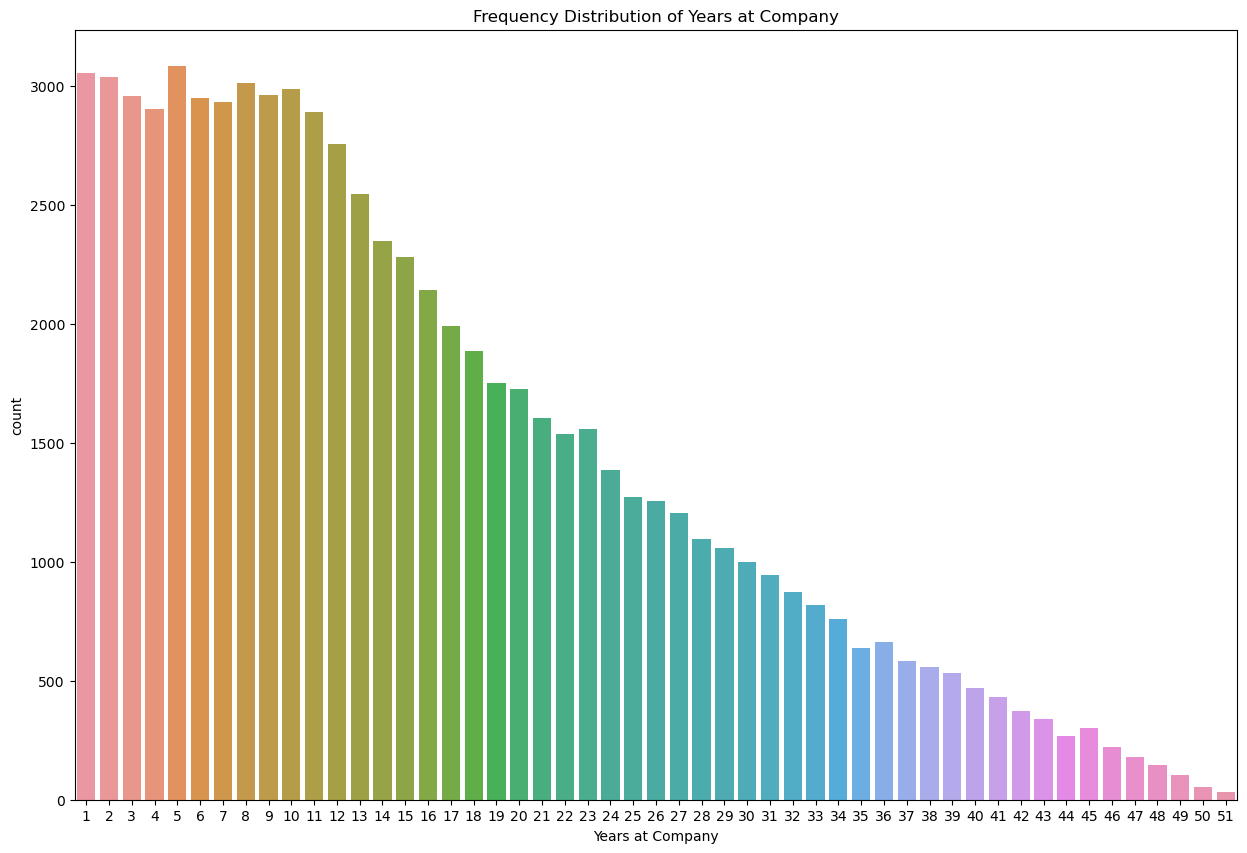

In [21]:
# Years at company
plt.figure(figsize=(15,10))
sns.countplot(data=data, x="Years at Company")
plt.title("Frequency Distribution of Years at Company");

* The most number of employees are between 1 and 10 Years at the company.

In [23]:
# Identifying the unique roles in the data
data['Job Role'].unique()

array(['Education', 'Media', 'Healthcare', 'Technology', 'Finance'],
      dtype=object)

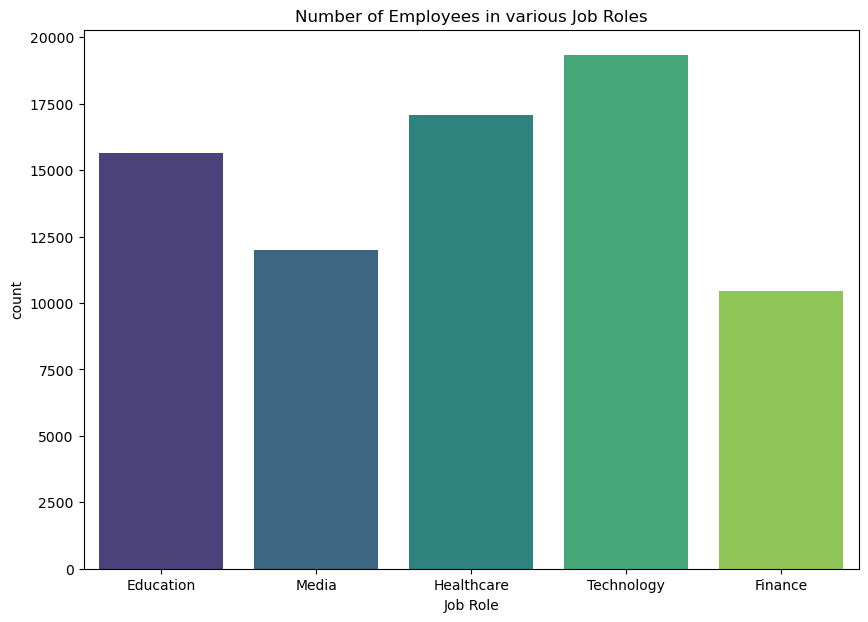

In [25]:
# comparing their counts with countplot
plt.figure(figsize=(10,7))
sns.countplot(data=data, x="Job Role", palette='viridis')
plt.title("Number of Employees in various Job Roles");

* Technology has the highest number of employees
* Finance has the least number of employees

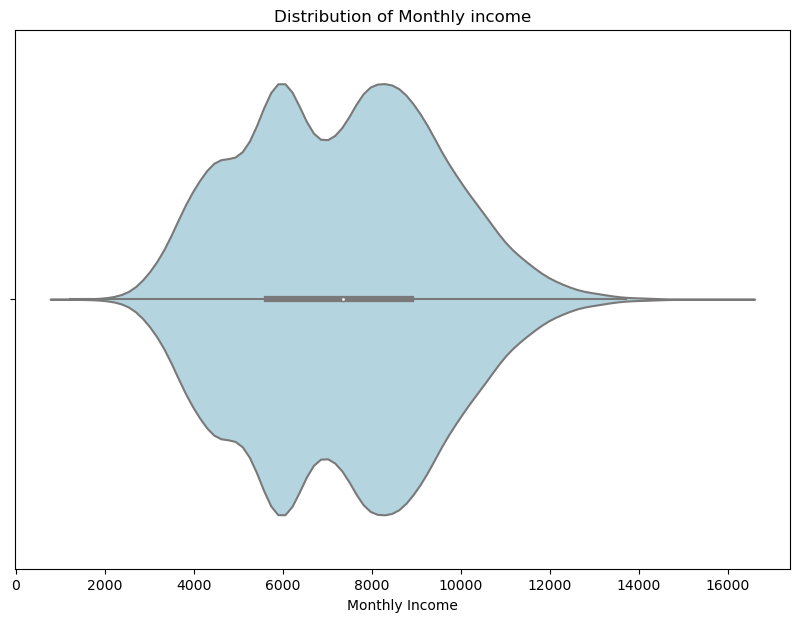

In [30]:
# Visualizing the monthly income
plt.figure(figsize=(10,7))
sns.violinplot(data=data, x="Monthly Income", shade=True, color="lightblue")
plt.title("Distribution of Monthly income");

* Most of the employees get in between 6000-8000 as salary.

In [34]:
# checking the median monthly income
data["Monthly Income"].median()

7348.0

In [35]:
# checking the unique values of worklife balance
data['Work-Life Balance'].unique()

array(['Excellent', 'Poor', 'Good', 'Fair', nan], dtype=object)

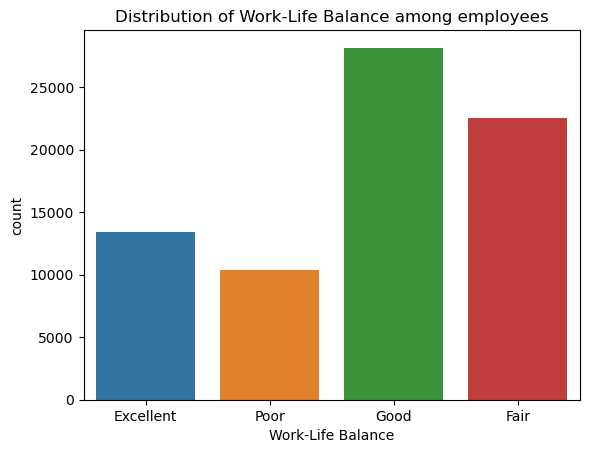

In [37]:
#visualizing the work life balance values
sns.countplot(data=data, x="Work-Life Balance")
plt.title("Distribution of Work-Life Balance among employees");

* Most of the employees feel that their work life balance is Good, followed by fair and excellent.
* Nearly 10000 employees feel their worklife balance is poor.

In [40]:
# Checking the unique values of job satisfaction
data["Job Satisfaction"].unique()

array(['Medium', 'High', 'Very High', 'Low'], dtype=object)

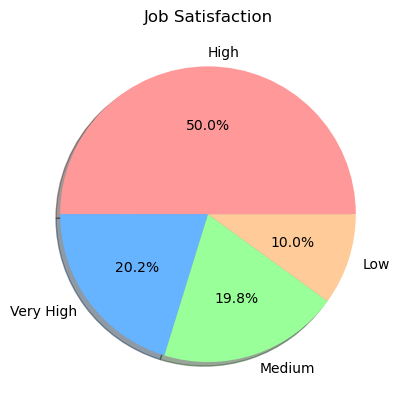

In [41]:
# Visualizing the Job satisfaction among employees
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(data["Job Satisfaction"].value_counts().values, labels=data["Job Satisfaction"].value_counts().index, autopct="%1.1f%%", shadow=True, colors=colors)
plt.title("Job Satisfaction")
plt.show()

* 50% of the employees are satisfied with their job.
* only 10% of the employees are having a low job satisfaction.

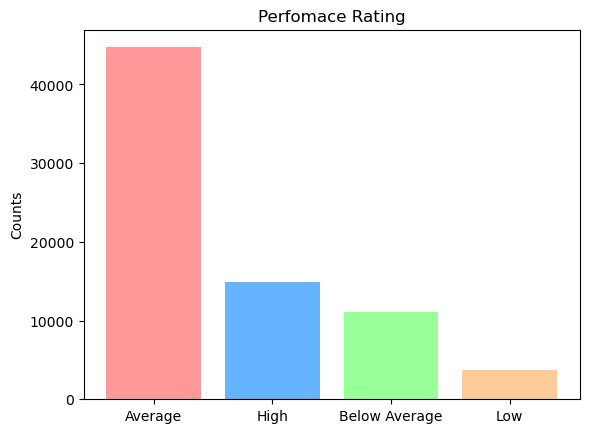

In [45]:
# Visualizing the perfomance rating of the employees
plt.bar(data["Performance Rating"].value_counts().index, 
       data["Performance Rating"].value_counts().values,
       color=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0'])
plt.ylabel("Counts")
plt.title("Perfomace Rating");

* Most of the employees got average perfomace rating.

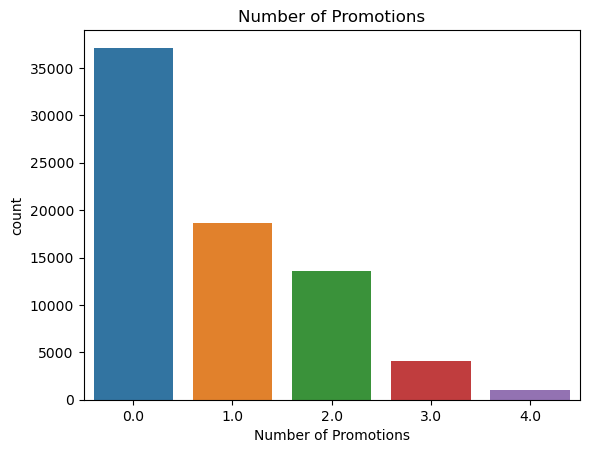

In [48]:
# Visualizing the number of promotions
sns.countplot(data=data, x="Number of Promotions")
plt.title("Number of Promotions");

* Most of the employees are un promoted followed by 1 and 2 promotions respectively.
* Rarely employees are promoted for 4 times.

In [49]:
# Checking the unique values of overtime
data.Overtime.unique()

array(['No', 'Yes'], dtype=object)

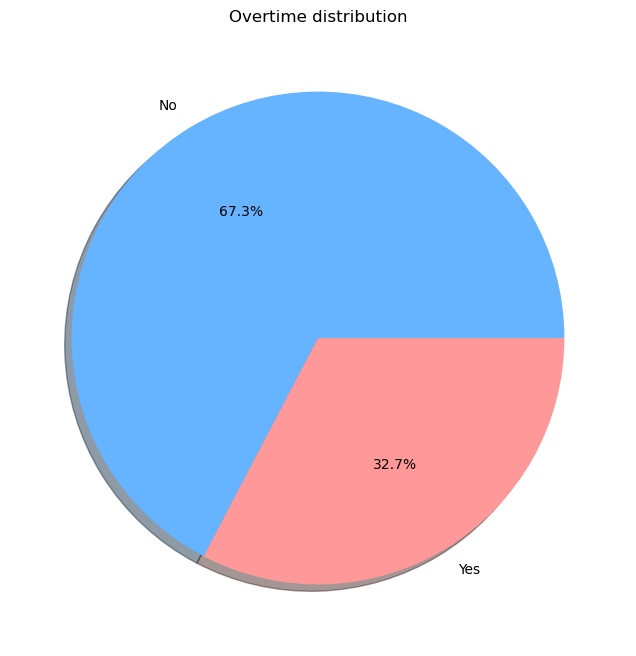

In [50]:
overtime_counts = data['Overtime'].value_counts()
colors = ['#66b3ff','#ff9999']
# plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(overtime_counts.values, labels=overtime_counts.index, autopct="%1.1f%%", shadow=True, colors=colors)
plt.title("Overtime distribution");

* ~67% employees don't do overtime

In [51]:
# checking the unique values of distance from home
data["Distance from Home"].unique()

array([22, 21, 11, 27, 71, 37, 75,  5, 39, 57, 51, 26, 78, 30, 98, 48, 17,
       86, 60, 10, 18, 95, 23, 16, 63, 92, 58, 55, 31, 32, 82,  8, 74,  3,
       76, 47, 67, 84, 14, 36, 79, 52, 44, 89, 64,  7, 87, 24, 15, 81, 13,
       35, 68, 56, 73, 41, 34, 29, 19, 50, 62, 49, 69, 33, 61, 53, 72, 91,
       65, 93, 28, 46, 54,  9, 45, 96, 94,  1, 88, 25,  6, 70, 12, 99,  4,
       97, 42, 38, 90, 43, 59, 85,  2, 40, 20, 77, 83, 80, 66])

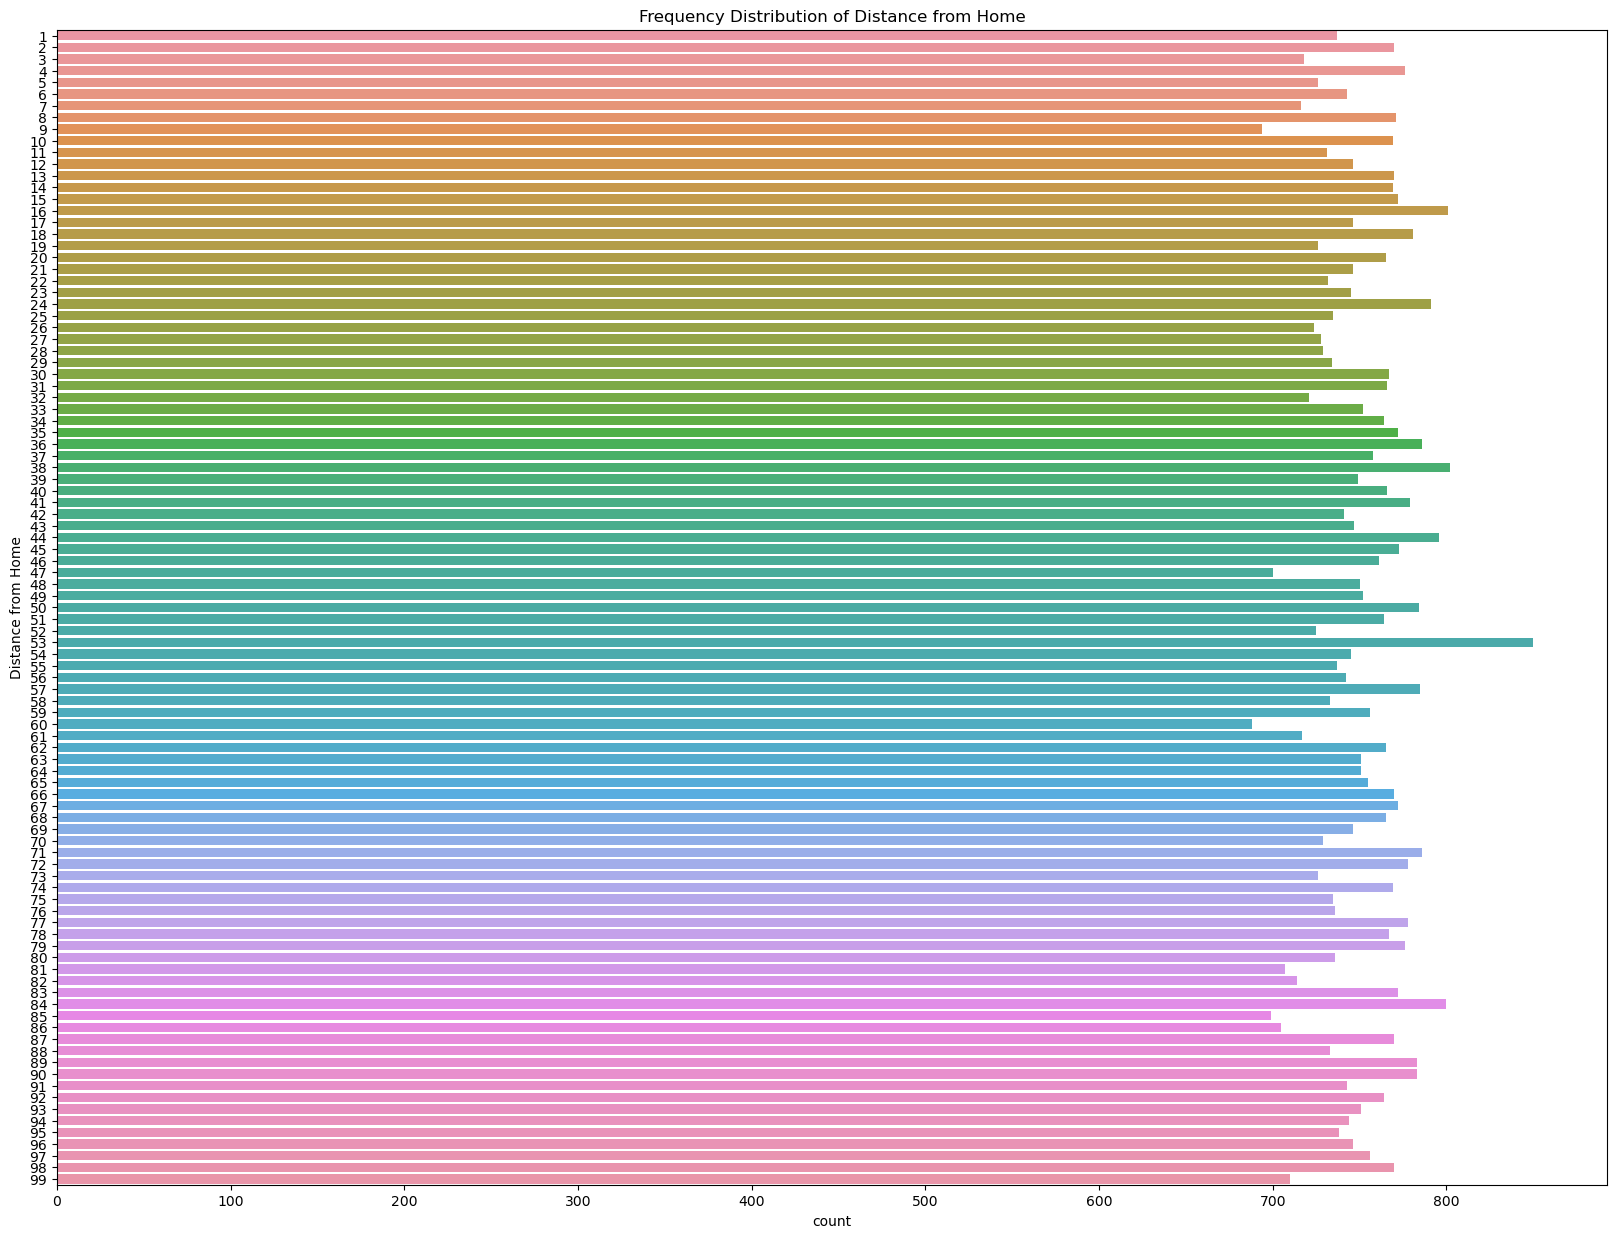

In [54]:
# PLotting the count plot of distance from home
plt.figure(figsize=(20,15))
sns.countplot(data=data, y="Distance from Home")
plt.title("Frequency Distribution of Distance from Home");

In [55]:
# finding the median distance
data["Distance from Home"].median()

50.0

In [56]:
# Visualizing the Education Level of employees
data["Education Level"].value_counts()

Bachelor’s Degree    22331
Associate Degree     18648
Master’s Degree      15019
High School          14679
PhD                   3816
Name: Education Level, dtype: int64

* Most of the employees are Having Bachelors degree, followed by associate degree and masters degree.
* A very few people have PhD

In [57]:
data['Marital Status'].value_counts()

Married     37417
Single      25999
Divorced    11078
Name: Marital Status, dtype: int64

Text(0.5, 1.0, 'Marital Status Distribution')

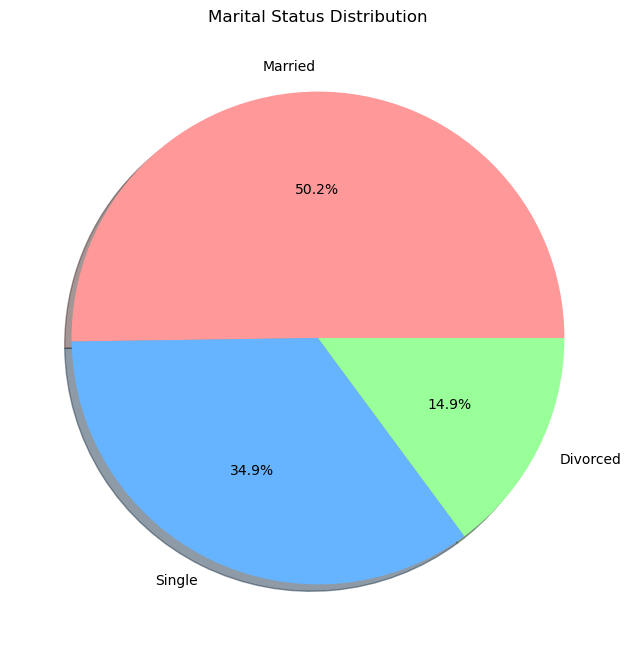

In [58]:
marital_status_counts = data['Marital Status'].value_counts()

# Choosing various colors
colors = ['#ff9999','#66b3ff','#99ff99']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(marital_status_counts.values, labels=marital_status_counts.index, autopct="%1.1f%%", shadow=True, colors=colors)
plt.title("Marital Status Distribution")

In [59]:
# Checking the value counts of number of dependents
data["Number of Dependents"].value_counts()

0.0    22256
1.0    19329
2.0    11116
3.0    10374
4.0     7620
5.0     3006
6.0      791
Name: Number of Dependents, dtype: int64

In [60]:
# checking the unique values of Job level
data["Job Level"].unique()

array(['Mid', 'Senior', 'Entry', nan], dtype=object)

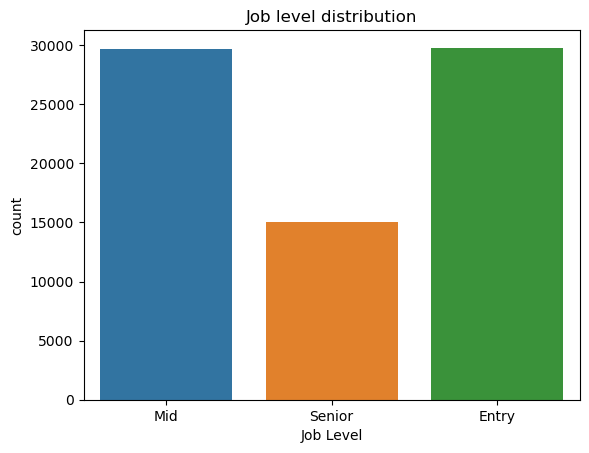

In [62]:
# Visualizing the job level with count plot
sns.countplot(data=data, x="Job Level")
plt.title("Job level distribution");

* Most of the employees are Entry or mid level. 
* A few number of employees are senior level.

In [63]:
# Checking the number of attritions
data["Attrition"].value_counts()

Stayed    39128
Left      35370
Name: Attrition, dtype: int64

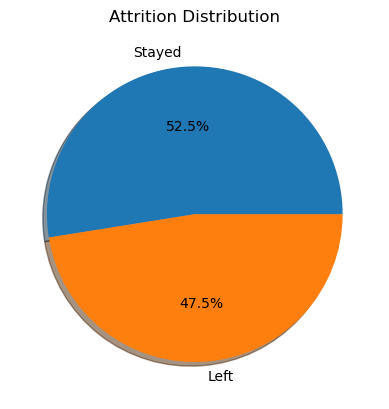

In [65]:
# Visualizing it with pie plot
plt.pie(data["Attrition"].value_counts().values, labels=data["Attrition"].value_counts().index, autopct="%1.1f%%", shadow=True)
plt.title("Attrition Distribution");

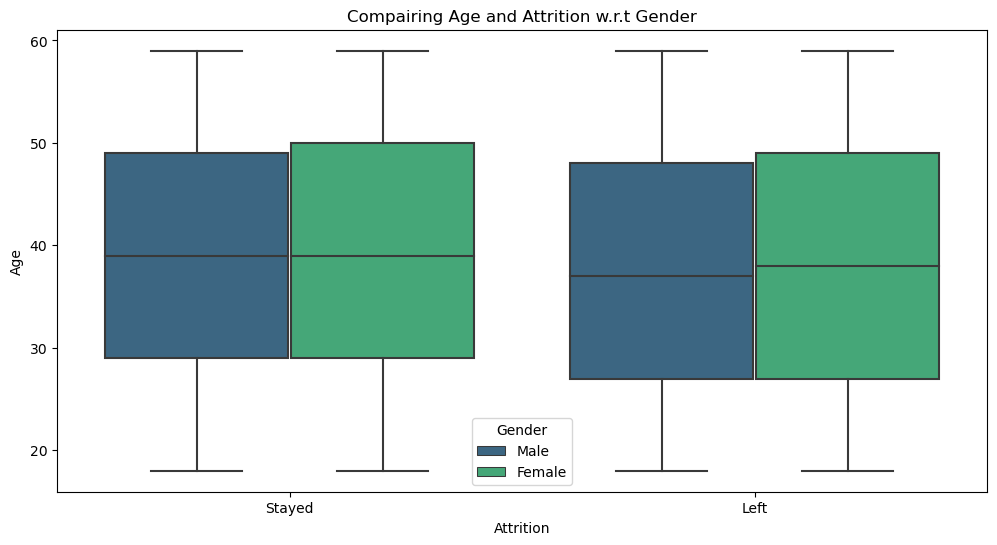

In [68]:
# Compairing Age and attrition w.r.t to Gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Attrition', y='Age', palette='viridis', hue="Gender")
plt.title("Compairing Age and Attrition w.r.t Gender");

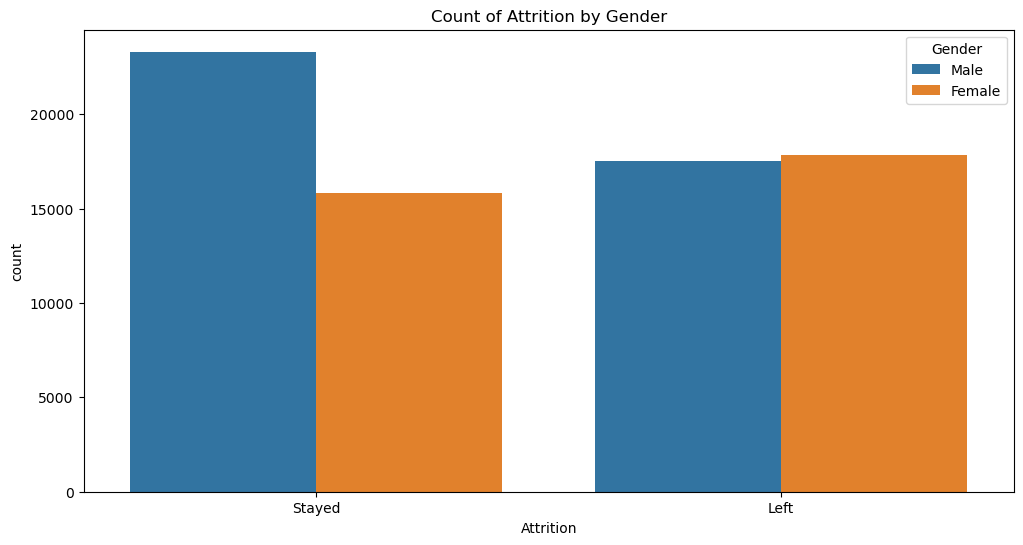

In [70]:
#compairing attrition and gender
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Attrition', hue='Gender')
plt.title('Count of Attrition by Gender');

* Most of the employees who stayed are Males and most of the employees who left are females.

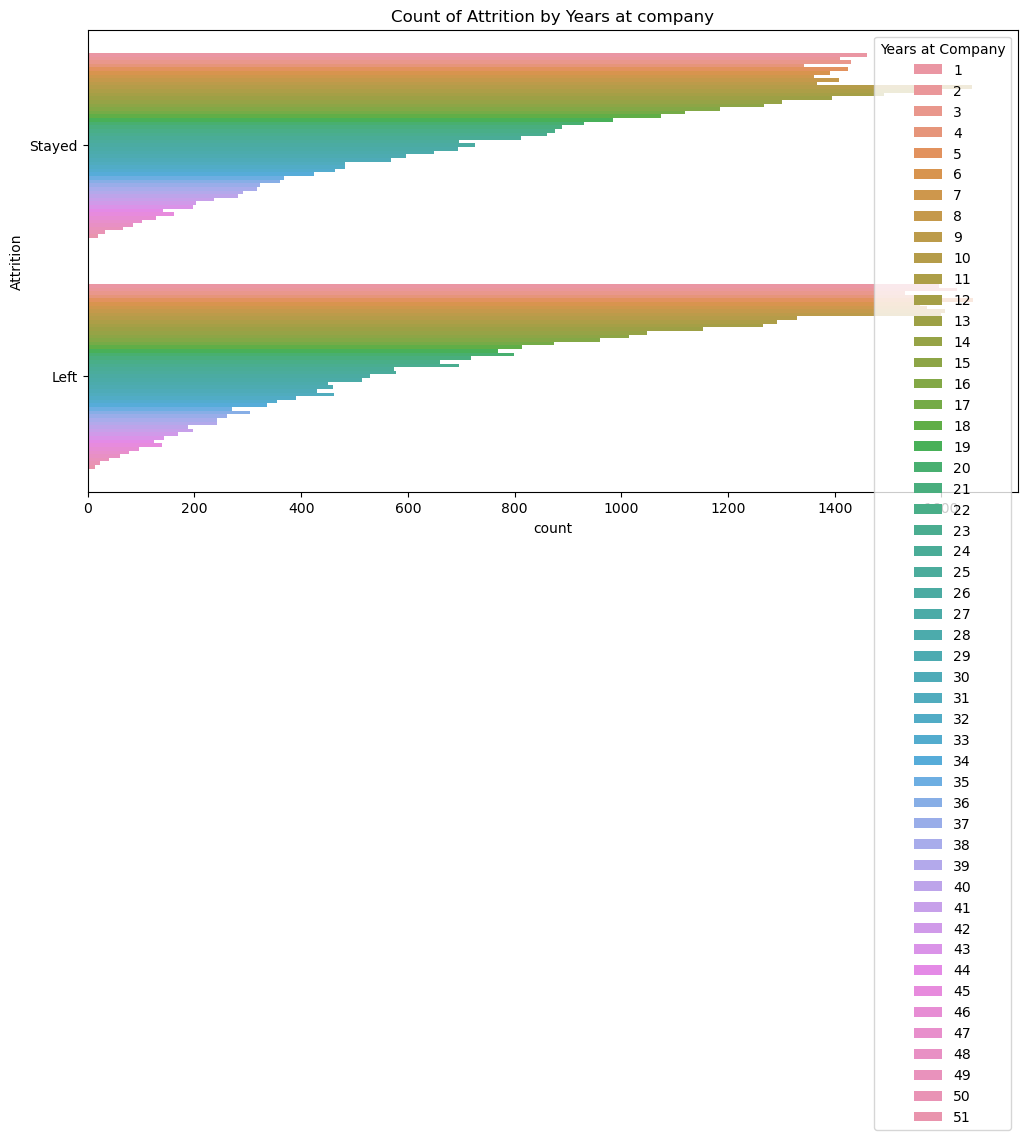

In [74]:
# Compairing years at company and attrition
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Attrition', hue='Years at Company')
plt.title('Count of Attrition by Years at company');

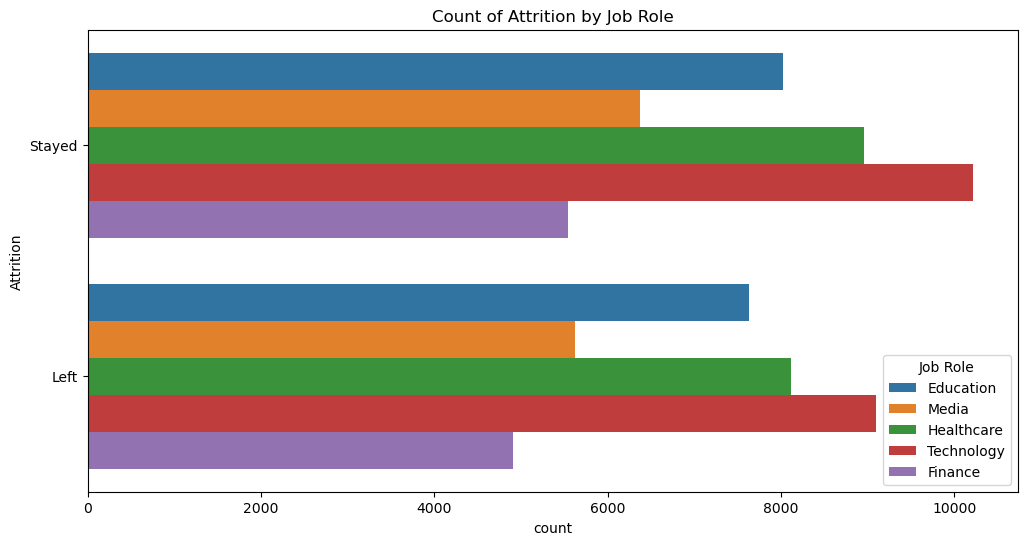

In [75]:
# Comapiring job role and attrition
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Attrition', hue='Job Role')
plt.title('Count of Attrition by Job Role');

* Highest attrition is among Technology
* Least attrition is among Finance
* Most number of employees who stayed are in Technology and the least is from Finance.

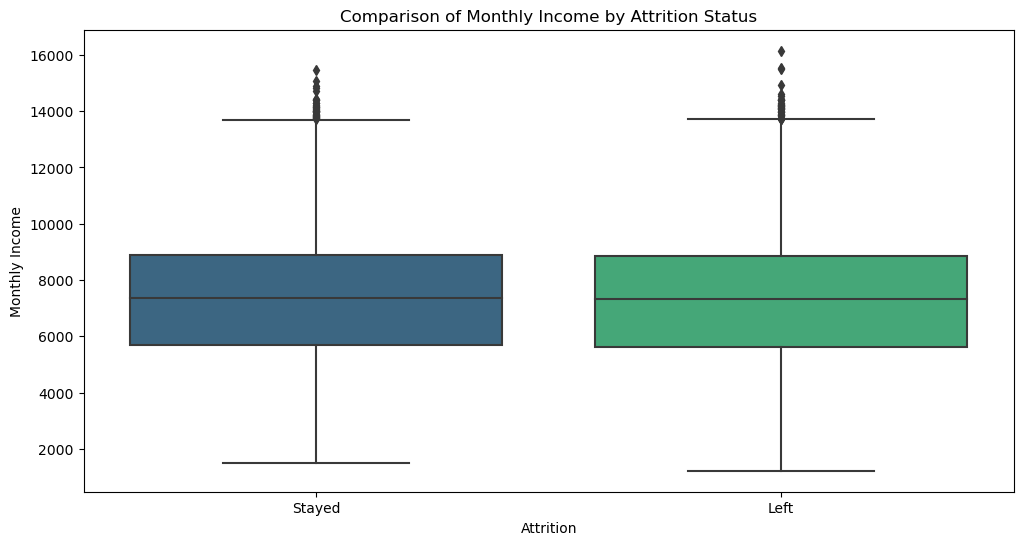

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Attrition', y='Monthly Income', palette='viridis')
plt.title('Comparison of Monthly Income by Attrition Status');

* The attrition is almost equal among the income segments.

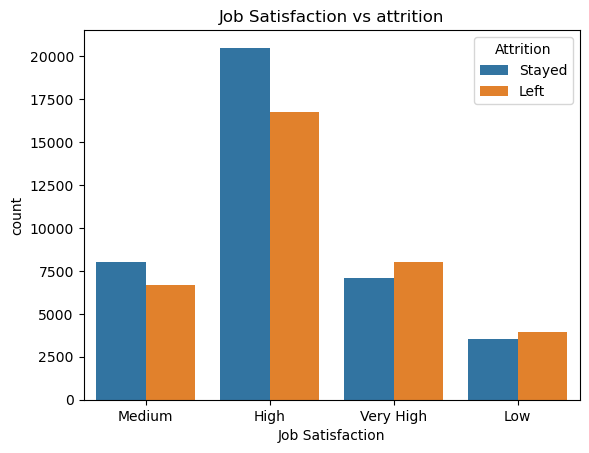

In [79]:
# Comapiring job satisfaction and attrition
sns.countplot(data=data, x='Job Satisfaction', hue='Attrition')
plt.title("Job Satisfaction vs attrition");

* Employees with higher job satisfaction stayed with the company although a high number of employees with high job satisfaction also left the company,

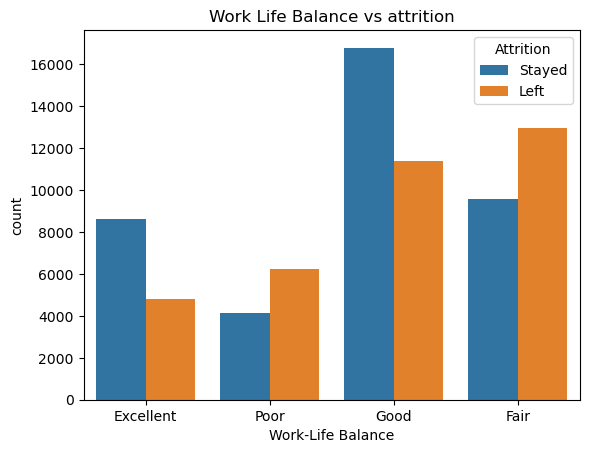

In [80]:
# Compairing work life balance with attrition
sns.countplot(data=data, x='Work-Life Balance', hue='Attrition')
plt.title("Work Life Balance vs attrition");

* Most of the employees with good work life balance stayed with the company
* Most of the employees with fair work life balance left the company.

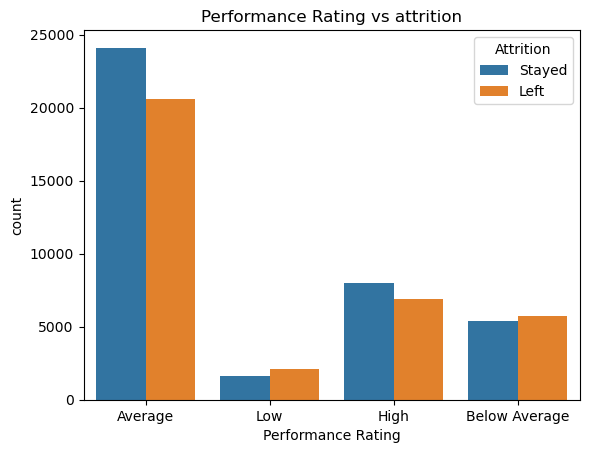

In [82]:
# Compairing Perfomance Rating with attrition
sns.countplot(data=data, x='Performance Rating', hue='Attrition')
plt.title("Performance Rating vs attrition");

* Highest number of attrition is among employees with average performance

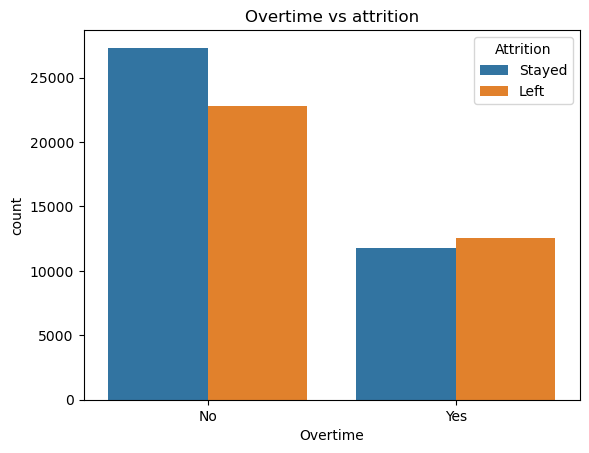

In [84]:
# Compairing Overtime with attrition
sns.countplot(data=data, x='Overtime', hue='Attrition')
plt.title("Overtime vs attrition");

* There is a higher chance of attrition when Overtime work is there.

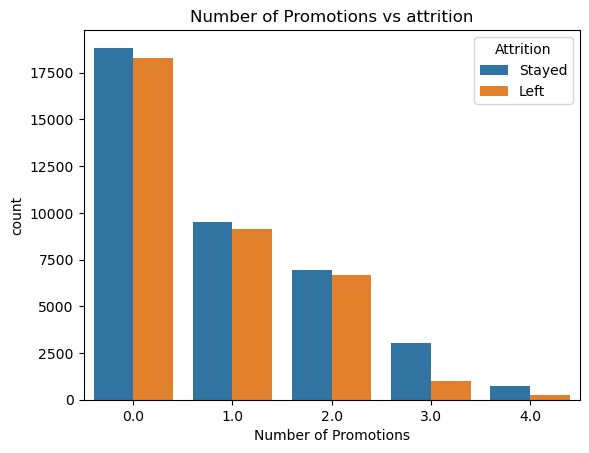

In [85]:
# Compairing number of promotions with Attrition
sns.countplot(data=data, x='Number of Promotions', hue='Attrition')
plt.title("Number of Promotions vs attrition");

* There is a higher chance of attrition among employees who don't receive any promotions`m

Text(0.5, 1.0, 'Count of Marital Status by Attrition Status')

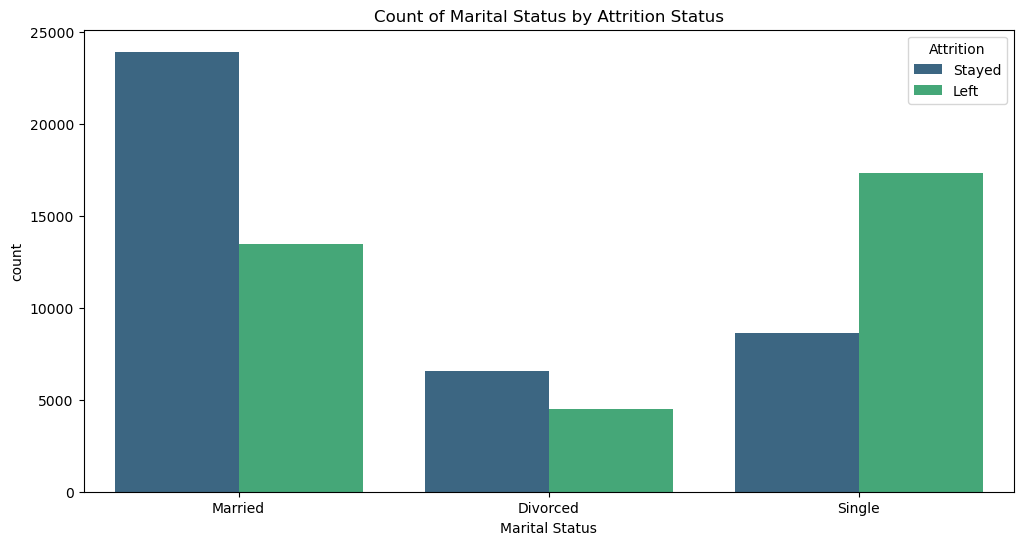

In [88]:
# Comapiring marital status with promotion
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Marital Status', hue='Attrition', palette='viridis')
plt.title('Count of Marital Status by Attrition Status')

* There is a higher chance of attrition among singles

In [87]:
data["Marital Status"]

0         Married
1        Divorced
2         Married
3          Single
4        Divorced
           ...   
74493      Single
74494     Married
74495     Married
74496    Divorced
74497    Divorced
Name: Marital Status, Length: 74498, dtype: object

Text(0.5, 1.0, 'Count of Leadership Opportunities by Attrition Status')

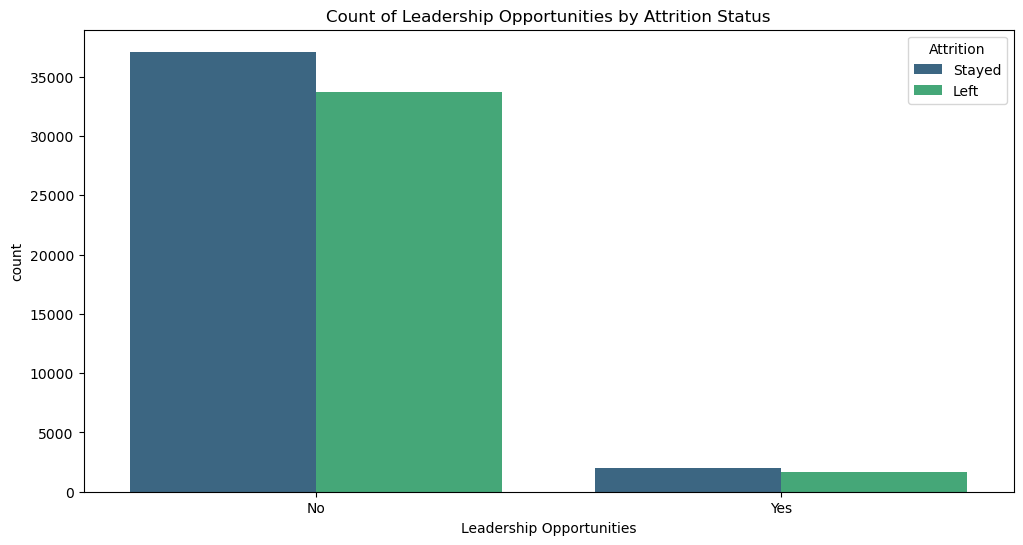

In [92]:
# Comapiring Leadership oppurtunuties with Attrition
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Leadership Opportunities', hue='Attrition', palette='viridis')
plt.title('Count of Leadership Opportunities by Attrition Status')

* There is a higher chance of attrition if there is a lack of leadership oppurtunities.

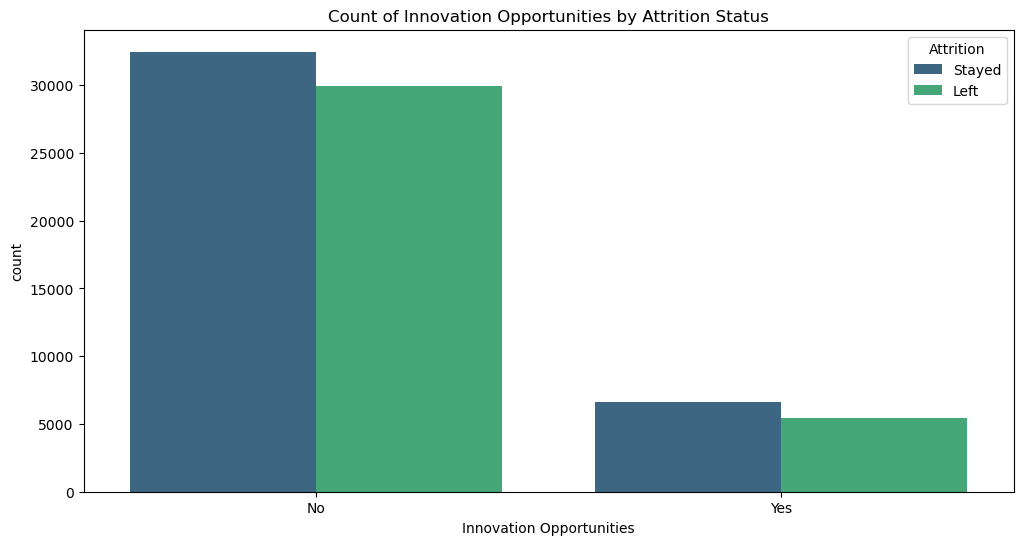

In [94]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Innovation Opportunities', hue='Attrition', palette='viridis')
plt.title('Count of Innovation Opportunities by Attrition Status');

* There is comparitively higher attrition if there is lack of innovation oppurtuninties

## Null Value handling

In [95]:
#checking null values
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

* Since this is a large dataset and the number of rows with na values are minimal we can simply drop na values

In [97]:
data.dropna(inplace=True)

In [98]:
data

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,...,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2.0,...,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,...,4.0,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0.0,...,3.0,Mid,Large,5,No,No,No,Poor,High,Stayed


In [99]:
#checking null values
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

<Axes: >

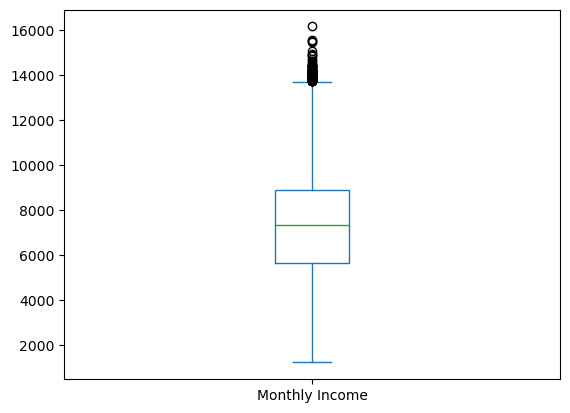

In [100]:
# Checking outliers in monthly income
data["Monthly Income"].plot(kind="box")

In [101]:
# finding the quantiles of monthly income
Q1 = data['Monthly Income'].quantile(0.25)
Q3 = data['Monthly Income'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [102]:
# Clipping the outliers
data["Monthly Income"] = np.where(data["Monthly Income"]>upper_bound, upper_bound,
                                 np.where(data["Monthly Income"]<lower_bound, lower_bound,data["Monthly Income"]))

<Axes: >

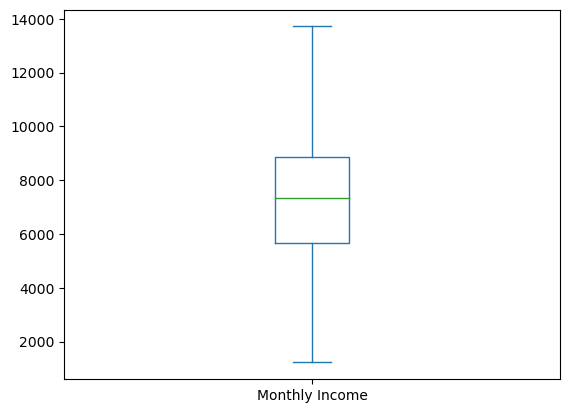

In [103]:
# Checking outliers in monthly income after clipping
data["Monthly Income"].plot(kind="box")

<Axes: >

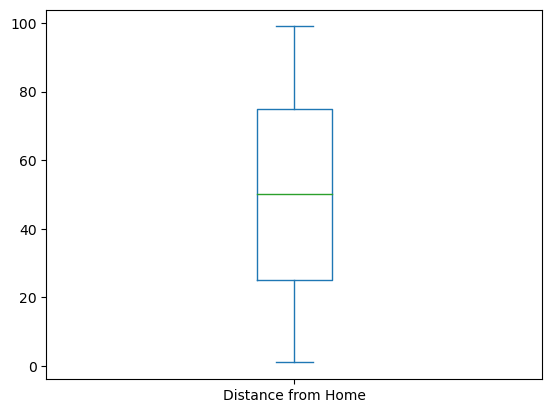

In [109]:
# Checking for outlier in Distance from Home column
data["Distance from Home"].plot(kind="box")

In [110]:
# Checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74461 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74461 non-null  int64  
 1   Age                       74461 non-null  int64  
 2   Gender                    74461 non-null  object 
 3   Years at Company          74461 non-null  int64  
 4   Job Role                  74461 non-null  object 
 5   Monthly Income            74461 non-null  float64
 6   Work-Life Balance         74461 non-null  object 
 7   Job Satisfaction          74461 non-null  object 
 8   Performance Rating        74461 non-null  object 
 9   Number of Promotions      74461 non-null  float64
 10  Overtime                  74461 non-null  object 
 11  Distance from Home        74461 non-null  int64  
 12  Education Level           74461 non-null  object 
 13  Marital Status            74461 non-null  object 
 14  Number

<Axes: >

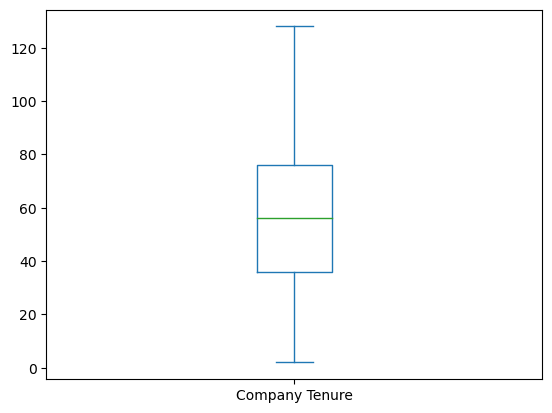

In [112]:
#Checking for outlier is company tenure column
data["Company Tenure"].plot(kind="box")

<Axes: >

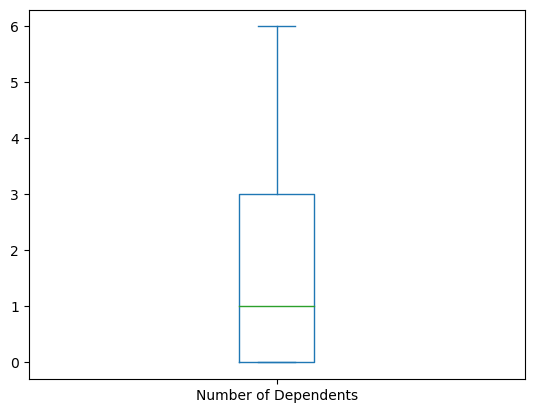

In [113]:
#Checking for outliers in Number of Dependents
data["Number of Dependents"].plot(kind="box")

> All the outlier are handled.

## Encoding and Scaling

In [114]:
# Since we don't need employee id column dropping employee id
data.drop("Employee ID", axis=1, inplace=True)

In [115]:
data.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390.0,Excellent,Medium,Average,2.0,No,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534.0,Poor,High,Low,3.0,No,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159.0,Good,High,Low,0.0,No,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989.0,Good,High,High,1.0,No,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821.0,Fair,Very High,Average,0.0,Yes,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [118]:
# Checking the dtypes
data.dtypes

Age                           int64
Gender                       object
Years at Company              int64
Job Role                     object
Monthly Income              float64
Work-Life Balance            object
Job Satisfaction             object
Performance Rating           object
Number of Promotions        float64
Overtime                     object
Distance from Home            int64
Education Level              object
Marital Status               object
Number of Dependents        float64
Job Level                    object
Company Size                 object
Company Tenure                int64
Remote Work                  object
Leadership Opportunities     object
Innovation Opportunities     object
Company Reputation           object
Employee Recognition         object
Attrition                    object
dtype: object

In [134]:
# Splitting the data into features and targets
X = data.drop("Attrition", axis=1)

# Mapping to numeric values 
data["Attrition"] = data["Attrition"].map({'Stayed': 0, 'Left': 1})
y = data["Attrition"]

X.shape, y.shape

((74461, 22), (74461,))

In [135]:
y.unique()

array([0, 1])

### We will be using Onehot encoder for converting categorical columns and MinMax scaler for scaling numerical columns

In [120]:
#finding the categorical and numerical columns
numerical_columns = X.select_dtypes(include=["float64","int64"]).columns
categorical_column = X.select_dtypes(include=["object"]).columns

In [136]:
# Creating a pipeline to do preprocesing on numerical and categorical features seperately

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Creating numerical column transformers to transform the numerical columns to scaled data
numerical_transformer = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])

# Creating categorical column transformers to transform the categorical columns to onehot encoded data
categorical_transformer = Pipeline(steps=[
    ("onehot_encoder", OneHotEncoder(sparse_output=False))])

# Combining the transformers into a single preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer, numerical_columns),
        ("categorical", categorical_transformer, categorical_column)
    ], remainder="passthrough")

In [137]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Company Tenure'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('onehot_encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
      dtype='object'))])

In [138]:
preprocessor.fit_transform(X)

array([[0.31707317, 0.36      , 0.33349351, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.06      , 0.34502643, ..., 1.        , 0.        ,
        0.        ],
       [0.14634146, 0.18      , 0.55526189, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.82926829, 0.08      , 0.35463719, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06      , 0.32436329, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.94      , 0.20406856, ..., 0.        , 0.        ,
        1.        ]])

## Modelling

In [140]:
#splitting to train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [141]:
# trying out 10 different classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

classification_models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    XGBClassifier(),
    AdaBoostClassifier()
]


In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_classification_models(X, y):
    """
    Apply classification models to the given data and evaluate their performance.

    Args:
        X (pandas.DataFrame): Input features.
        y (pandas.Series): Target variable.
    Returns:
        pandas.DataFrame: DataFrame containing model metrics.
        list: List of trained classification models.
    """

    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model_metrics = {}
    models = {}  # Dictionary of model pipelines

    #Iterating over the models list and iteratively fitting the data on the pipeline
    for model in classification_models:
        model_pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("model", model)
        ])
        model_pipeline.fit(X_train, y_train)
        y_pred = model_pipeline.predict(X_test)
        y_prob = model_pipeline.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        
        # Creating a dictionary to store metrics
        metric = dict()
        metric["accuracy"] = accuracy_score(y_test, y_pred)
        metric["precision"] = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        metric["recall"] = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        metric["f1"] = f1_score(y_test, y_pred, average='weighted')
        model_metrics[model.__class__.__name__] = metric
        models[model.__class__.__name__] = model_pipeline

    model_metrics_df = pd.DataFrame(model_metrics).T
    return model_metrics_df, models

In [143]:
model_metrics_df, trained_models = evaluate_classification_models(X, y)

In [144]:
model_metrics_df

,accuracy,precision,recall,f1
LogisticRegression,0.748002,0.747881,0.748002,0.747925
DecisionTreeClassifier,0.663869,0.664030,0.663869,0.663940
RandomForestClassifier,0.743369,0.743160,0.743369,0.743191
GradientBoostingClassifier,0.755657,0.755546,0.755657,0.755586
SVC,0.744108,0.744008,0.744108,0.744048
KNeighborsClassifier,0.684013,0.684692,0.684013,0.684216
GaussianNB,0.717048,0.722841,0.717048,0.716964
XGBClassifier,0.748472,0.748472,0.748472,0.748472
AdaBoostClassifier,0.763580,0.763449,0.763580,0.763487


In [145]:
# Sorting the model metrics by f1 score since it is the overall
# better classification metric 
model_metrics_df.sort_values(by="f1", ascending=False)

,accuracy,precision,recall,f1
AdaBoostClassifier,0.763580,0.763449,0.763580,0.763487
GradientBoostingClassifier,0.755657,0.755546,0.755657,0.755586
XGBClassifier,0.748472,0.748472,0.748472,0.748472
LogisticRegression,0.748002,0.747881,0.748002,0.747925
SVC,0.744108,0.744008,0.744108,0.744048
RandomForestClassifier,0.743369,0.743160,0.743369,0.743191
GaussianNB,0.717048,0.722841,0.717048,0.716964
KNeighborsClassifier,0.684013,0.684692,0.684013,0.684216
DecisionTreeClassifier,0.663869,0.664030,0.663869,0.663940


* The ada boost classifier has the highest metrics

In [147]:
trained_models.keys()

dict_keys(['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'SVC', 'KNeighborsClassifier', 'GaussianNB', 'XGBClassifier', 'AdaBoostClassifier'])

In [148]:
trained_models["AdaBoostClassifier"]

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Company Tenure'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot_encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
      dtype='object'))])),
                ('model', AdaBoostClassifier())])

In [149]:
trained_models["AdaBoostClassifier"].score(X_test, y_test)

0.763580205465655